In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import cv2
import scipy
import tqdm
import numpy as np
import os
import pandas as pd
import random

In [4]:
from keras.models import load_model
model = load_model('model.h5')

In [1]:
def load_dataset(path):
    image_paths = []
    labels = []
    for label in os.listdir(path):
        for image in os.listdir(path + "/" + label):
            image_paths.append(path + "/" + label + "/" + image)
            labels.append(label)
    return image_paths, labels

def extract_features(images):
    features = []
    for img in tqdm.tqdm(images):
        img = load_img(img, color_mode='grayscale')
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(features.shape[0], 48, 48, 1)
    return features

test_path = 'dataset/valid'
test = pd.DataFrame()
test['image_path'], test['label'] = load_dataset(test_path)

NameError: name 'pd' is not defined

In [9]:
test_features = extract_features(test['image_path'])

100%|██████████| 2000/2000 [00:10<00:00, 197.74it/s]

(2000, 48, 48)


In [9]:
x_test = test_features/255

In [14]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(test['label'])
y_test = le.transform(test['label'])

y_train = tf.keras.utils.to_categorical(y_train, num_classes=5)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=5)
y_train.shape, y_test.shape

((2000, 5), (2000, 5))

Original Output: fear
1/1 [==============================] - 0s 50ms/step
Predicted Output: fear
test_image/test/fear/415284444.png
[[4.2354228e-11 9.9999964e-01 2.6160774e-10 1.0329996e-07 2.7951992e-07]]


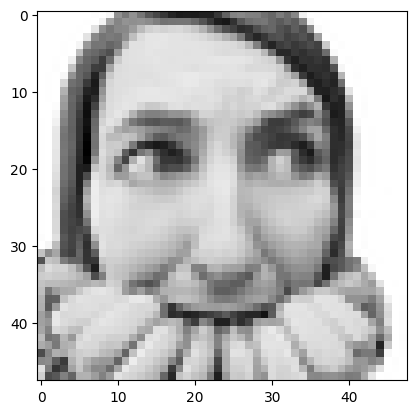

In [21]:
import random
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');
print(test["image_path"][image_index])
print(pred)

In [8]:
import io, base64
from PIL import Image
def preprocess_input_predict(base64_image):
    decoded_img = base64.b64decode((base64_image))
    img_rgb = Image.open(io.BytesIO(decoded_img))
    img_gray = img_rgb.convert('L')
    np_img = [np.array(img_gray)]
    np_img = np.array(np_img)
    np_img = np_img.reshape(np_img.shape[0],48, 48, 1)
    np_img = np_img / 255.0
    print(np_img.shape)
    return np_img

In [9]:
base64_image = "iVBORw0KGgoAAAANSUhEUgAAADAAAAAwCAAAAAByaaZbAAAHw0lEQVRIDT3Be3BU1RkA8O875969d5/J5k0SSKAJAVQiooAWO4oNvqbaER1tsdo/Ch0frbWdjo6jrWPHPuxgtdUqxVGxZVrtA8uUYsVxkCBSSEIJQgjBkGSzCdlH9u7u3fs+52titb8fEnxKMvfVmcbpVKGctxgp0LCsXXWpbNUVWrYkCOH/kGAeYWXPZCLgrlnmCGZuOu01d9SHeNFMmEvvixHC55BgDuHU7kyC1SyqU4XCvEp+fDRVzKstNaG8VVe88gEF4XNIAEA49WY+5DeubA0DSpLCd+yCceZQrrpBndWixp3fkAw+gwRAaP1pFIvh65aDgkSERCSkdKePHrzQqFX0iPXUasngf5AACD94xzHLPddx5AQExEgGEiGQ6ff2U5UTZRf/XIXPIAGhsSNVSa38ei1DZCQZATAEAuH6/tHXC9VScx6/WTL4FBJIdvhN77zYspozQIYAQnIABoGLIJ3Dr5eqSXbuCBPCPCRCZ+fpwn/Wba1lSMA4MgYCSCBKRGmYo69OxjX7p9dLBvOQCM+8Zg2N33OHDgxRMsY4BeQTA6kx22ChwV9acfvGXxDCPCTCvfvsfvd7G1SmMAQJhALI99FRYn5ZCRMdfI4iVTubCWEOEuGuYxf66r67RlWQAQCRCJCLCgtC3AVNmNnE/jca7Gc2SgZzkEC80Z/qX/Vgp6rIsol6jPmcwHM0j4POZ6cnUgvat2X4ffcJDnOQwNk+MjJ489Z63RoZMUGNk7awBRypempxxDJmsqXwtccPabc8LRnMQYmllyZOjW7aUmX3DedLQiORuKQtqnJpW5necdJrWxPW8LBYtUOFeSgx82L21NnND9rnSpptOK5rKg117Qlm5s6fTftKtH5RKzty1F78WhUhAKDEmV8bHw/ef28awt7kJ6kgGed60+IY5Wb6pqRlMTXR3TWyJ2jevoAQAFDizAvFvpPfuddkRu+BvBlq6GyLN3XE7WzqsCyavjprtvQ4+7BmeyshAKDE6Zdzx07/8B7D2nn62rqDU6XYiouXLIk65RPHXb9+teg9Wfhi7SGl4aUmQgBAidMvzgyMbluf7+3d2j2yrx/8ukvWL4yKSu8pP/Hllvzr6WJ749F48vlmQgBAiZMv5A8HO6vTb3dvMGf+OhWm2u6LWnSyDo/58e4a659Zuym5PxF/bgEhAKDEse3Zj1b8qpL5hDVFMT0ejkTizTUqOIP5iB+Pi7F0eGnxj0r9tjpCAECJ517O9m3+dtFl2QthFkimh8PRmIqVc05IBMSlGk7OvlTqfCpJCAAo2NBvc6cevaHM0TZ9zyMejqkKV7kxwTRAJIVDWL524oonIgCEgBKHn7+QfnKNzaXn+hQQ01WOUmOFSa5xhQPjKnf377v6URXmocRzT2fzP9hgscD3JCMGwFQpdVYcp6imKAw4k/bg39Y9xmAeShz+cdm4+06TB74ghigF4xIirJCyIrGwhhLAts/uvewRjRAAUOLI45a99iEbAiGRoww8ZFwJseJMFmui4ZCQomSePrjxIUKYgxJHnijpkScV8iUxJgLXISWpcm4VJ/KN0bDKyZp1jwzdtlUymIMBn/hRPpl+rNOXkkBK37Lt+EKFgWunhxqjmq4Ir5x/x7p7s2QwB8n+9ytGy+Ddt9oYBDIQrlspLG4lJoRlnPWSER3JlScO1H7rZsFhDh7qa37LXDqw7DEX/MANpOcYbEWIeMAqs8bpmlpdDSw6eqxj062cEABw84PuwYw8yZ/RyHc9z7cySnskqgRCmnmrPFuV0IVXOcT1ptgDSUIA/KDVxty59/t/1ub6jmXaU4nL+QG6lBcDMcG606lqnYnsX7oSTQ2rrtQAAAcUnzwzt7v7RsfP5soz2oYGeWqgIVrwZ82rWpzjlBTyVP9X1yYjY03rAQAPOxAIh0W8NnfodKEYX7dQ405mqEgVbGsNuROZGsEGV6yriln50nWthPjBe1+Is+ZanXmVvmzjWGKJgugY56colKwJh4LcsUsW1zWykuEhl/XXAuDet5XN9REpAXwWQ/vETFuE3MKFggjFEhqbSndcLbCWqNQLMt9xUxXhnt1f2mgzRgELgRugs+vDSxfXhIQM+ZY5M6XftgrQkbpEu/dIbFnPEsI/TN5bYowCTQuCQHoz7x7QCmoiHK2eLlow2/PNRYyYTWEp6aOPlvYsk7ircovp+5TQRBAIN23EI9bu1PWZvXDReP3tUaEsTwoJlh9lHhs4d9cSiW+dv9UzxCJOJIQ/6l/OcqmPOzoz/6i9Zshf0xSdnW5XpMRSUC0cs/+iayS+vz+8NnVV1AGXYGz8K2rFzQx1xUrHu1qK41fUgD5ut0mQkPMbZ0f61m8SuLs8elmoM6CKx1IDX2soi/KZ4gYvf2z1QmUstBiIji9MABPBxwU38eyOKyTevrbLa4ypQcEr9N613AgqxvtrLi0bf964kqzznSERHp5cLRXJJ/dUwZG3NcJt6snR7zdlci4dv/Gq2aBsDpx5mFlTv9vSCXiiIxlwtmdZs0JecRhzifslw/Hfv1t3R/v4FEutuaYUmKXcKzdtMszhNx5uQ/1oTZcL0eEj6/Ro9oKl11/WTIiDP4l0Td2AuXRzjymsivmvD39TbVSO7HpkpYj2V3psztS/S525Jb78ygWE8F9uj2IvYChlBgAAAABJRU5ErkJggg=="
preprocessed_img = preprocess_input_predict(base64_image)
model.predict(preprocessed_img)

(1, 48, 48, 1)
1/1 [==============================] - 0s 29ms/step


array([[4.2354228e-11, 9.9999964e-01, 2.6160774e-10, 1.0329996e-07,
        2.7951992e-07]], dtype=float32)